In [4]:
# 1. Import Libraries & Load Dataset
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt  # ✅ Add this line
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [3]:
# Load Dataset
df = sns.load_dataset('penguins')
print(df.head(10))
print("Shape:", df.shape)


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   
6  Adelie  Torgersen            38.9           17.8              181.0   
7  Adelie  Torgersen            39.2           19.6              195.0   
8  Adelie  Torgersen            34.1           18.1              193.0   
9  Adelie  Torgersen            42.0           20.2              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
5       3650.0    Male  
6       36

In [5]:
# 2. Understanding the Data
print(df.dtypes)
print(df.isnull().sum())
print(df.describe())
print(df.nunique())


species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.0

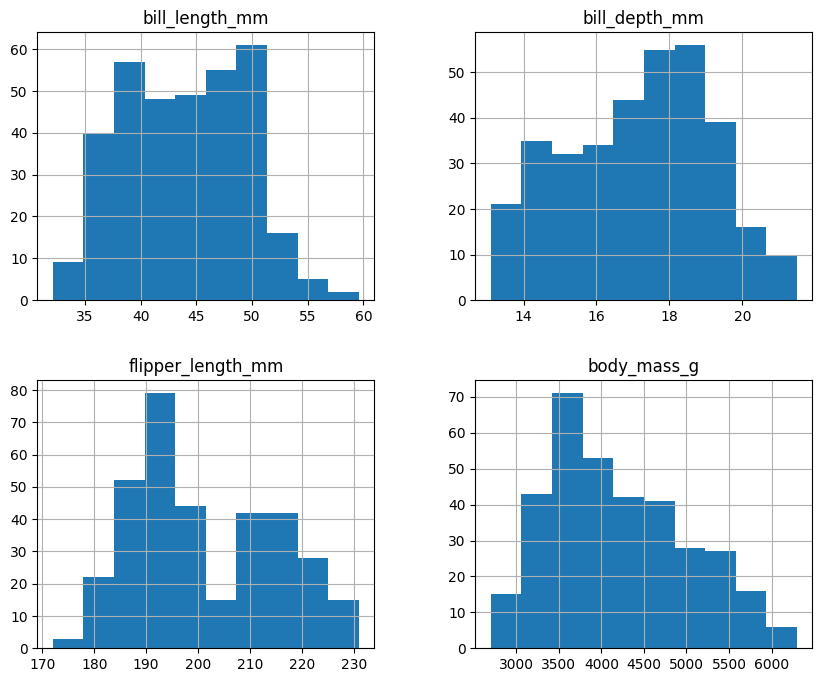

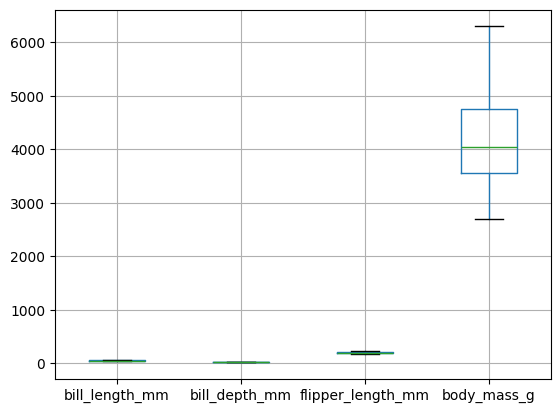

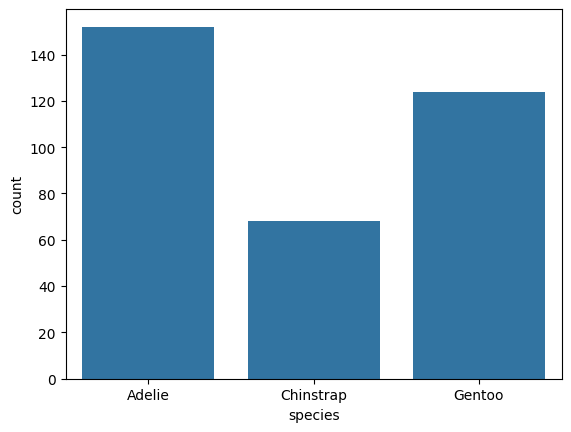

In [6]:
# 3. EDA - Univariate Analysis
df.hist(figsize=(10, 8))
plt.show()

df.boxplot(column=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])
plt.show()

sns.countplot(x='species', data=df)
plt.show()

In [7]:
# Calculate skewness only for numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(df[numeric_cols].skew())  # ✅ This will work without errors


bill_length_mm       0.053118
bill_depth_mm       -0.143465
flipper_length_mm    0.345682
body_mass_g          0.470329
dtype: float64


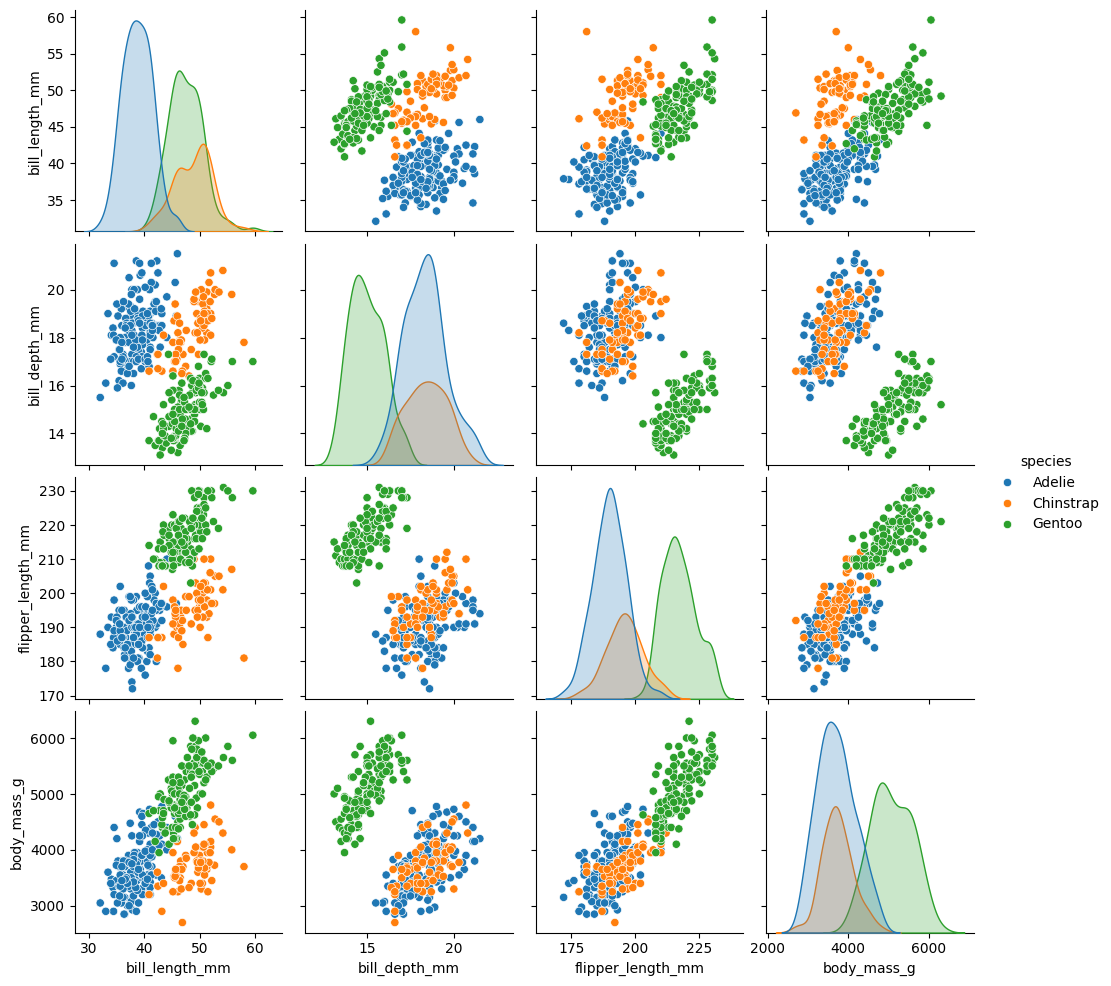

In [8]:
# Bivariate Analysis
sns.pairplot(df, hue='species')
plt.show()


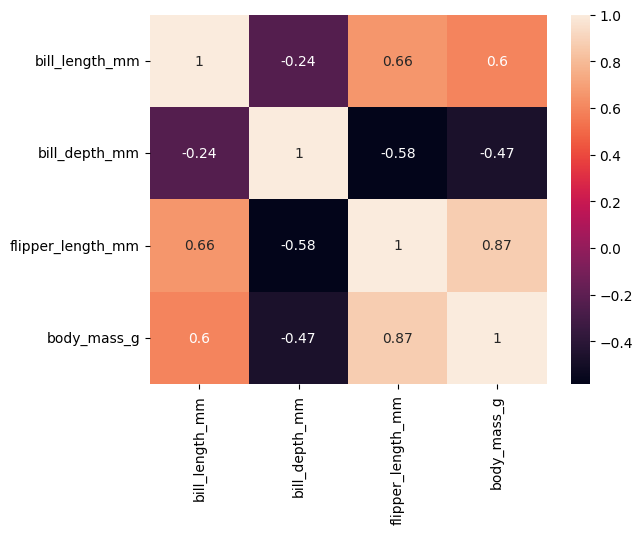

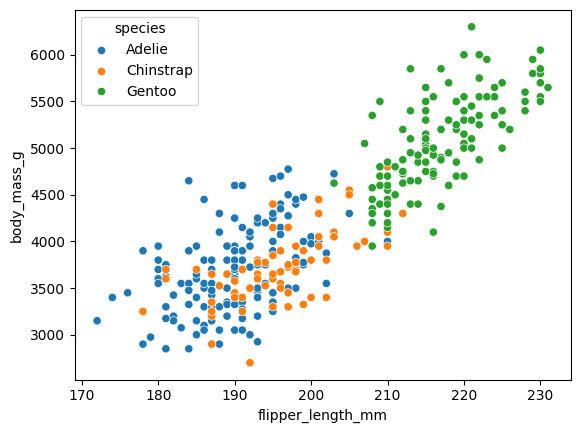

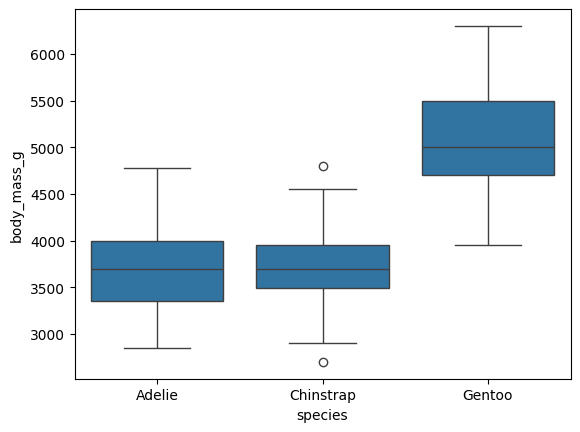

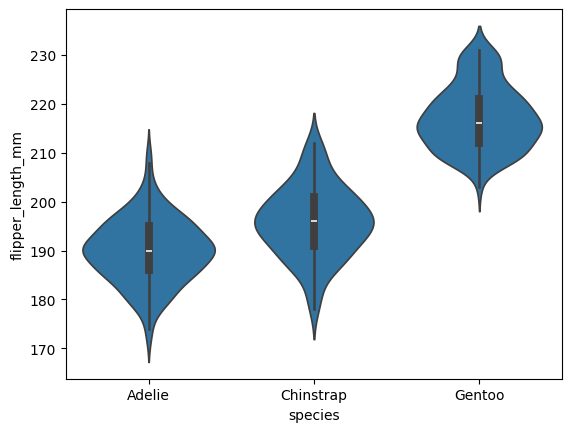

In [9]:
# Select only numerical columns for correlation
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_cols.corr(), annot=True)  # ✅ Fixed
plt.show()


sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='species', data=df)
plt.show()

sns.boxplot(x='species', y='body_mass_g', data=df)
plt.show()

sns.violinplot(x='species', y='flipper_length_mm', data=df)
plt.show()

In [10]:
# 4. Train-Test Split
df.dropna(inplace=True)
X = df.drop('species', axis=1)
y = df['species']
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(266, 7) (67, 7) (266,) (67,)


In [11]:
# 5. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
print(X_train_scaled.head())

scaler_minmax = MinMaxScaler()
X_train_norm = scaler_minmax.fit_transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns)
print(X_train_norm.head())



   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0       -0.593727      -1.750939           0.935943     0.539737   
1       -1.261043       0.323107          -0.719956    -1.072364   
2        1.093099      -0.638036           1.655899     1.407791   
3       -1.520555       1.031318          -0.863947    -0.514329   
4       -0.667873       0.879558          -1.511908    -0.328318   

   island_Dream  island_Torgersen  sex_Male  
0     -0.794923         -0.376339 -1.038328  
1      1.257984         -0.376339 -1.038328  
2     -0.794923         -0.376339  0.963087  
3     -0.794923         -0.376339 -1.038328  
4     -0.794923         -0.376339  0.963087  
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0        0.320000       0.071429           0.711864     0.541667   
1        0.189091       0.559524           0.322034     0.180556   
2        0.650909       0.333333           0.881356     0.736111   
3        0.138182       0.726190           